<a href="https://colab.research.google.com/github/konrado10/NaukaGIT/blob/master/Zad139.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning w języku Python - Konwolucyjne Sieci Neuronowe

## Funkcje aktywacji

### Zad 1 $f(x) = max(x,0) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 125  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [3]:
def max_relu(x):
    return max(x,0)


In [5]:
for i in [-10,-5,0,5,10]:
    print(max_relu(i))

0
0
0
5
10


In [6]:
data = np.arange(-5,5,0.1)
data_relu = [max_relu(x) for x in data]

Text(0.5, 1.0, 'ReLu')

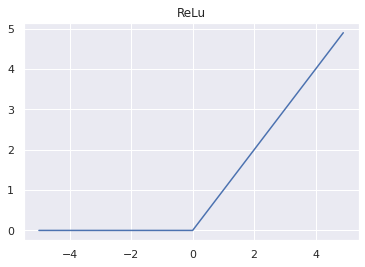

In [9]:
_ = plt.plot(data, data_relu)
plt.title('ReLu')

### Zad 2 Sigmoid
#### $f(x) = \frac{1}{1+e^{-x}}$

In [10]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

Text(0.5, 1.0, 'Sigmoid')

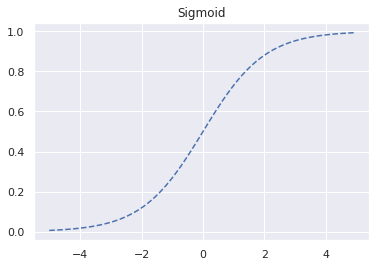

In [12]:
sigmoid_data = [sigmoid(x) for x in data]

plt.plot(data, sigmoid_data, '--')
plt.title('Sigmoid')

### Zad 3 Softmax
## $S(y_i)=\frac{e^{y_i}}{\sum_{j=1}^{i}e^{y_j}}$

In [14]:
data = np.random.randn(3,5)
data

import pandas as pd
df = pd.DataFrame(data)
df

,0,1,2,3,4
0,-0.649341,-0.378152,-0.188608,0.189248,-0.659242
1,0.860746,0.527298,-0.925015,0.872309,-0.635194
2,0.917327,0.815650,-2.518866,1.516322,0.685744


In [15]:
np.exp(df)

,0,1,2,3,4
0,0.522390,0.685127,0.828111,1.208341,0.517243
1,2.364925,1.694348,0.396526,2.392429,0.529833
2,2.502593,2.260644,0.080551,4.555438,1.985249


In [16]:
np.sum(np.exp(df))

0    5.389907
1    4.640118
2    1.305187
3    8.156208
4    3.032325
dtype: float64

In [18]:
res = np.exp(df)/np.sum(np.exp(df))
res

,0,1,2,3,4
0,0.096920,0.147653,0.634477,0.148150,0.170576
1,0.438769,0.365152,0.303807,0.293326,0.174728
2,0.464311,0.487195,0.061716,0.558524,0.654695


In [19]:
np.sum(res, axis=0)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [24]:
np.argmax(res[0])

2

In [25]:
res[0]

0    0.096920
1    0.438769
2    0.464311
Name: 0, dtype: float64

### Zad 4
## $tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$

In [26]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

Text(0.5, 1.0, 'Tanh')

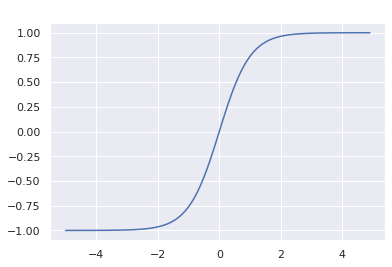

In [32]:
data = np.arange(-5,5,0.1)
tanh_data = [tanh(x) for x in data]
plt.plot(data, tanh_data)
plt.title('Tanh', color = 'w')

## Funkcja straty

### Zad 5,6 Accuracy, Entropia

In [42]:
import numpy as np

def entropy(labels, base = None):
    from math import log, e
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    value, counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <=1:
        return 0

    ent = 0
    base = e if base is None else base
    for i in probs:
        ent -= i*log(i, base)
    return ent   

In [43]:
labels = [1,3,5,2,3,5,3,2,1,3,4,5]
entropy(labels=labels)

1.5171063970610277

### Zad 7 Binary CrossEntropy

In [45]:
def binary_crossentropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 0.00000001, 1-0.0000001)
    return -y_true*np.log(y_pred) - (1-y_true)*np.log(1-y_pred)

In [46]:
y_true = np.array([1,0,0,0,0])
y_pred = np.array([0.4, 0.3, 0.05, 0.05, 0.2])

binary_crossentropy(y_true, y_pred)

array([0.91629073, 0.35667494, 0.05129329, 0.05129329, 0.22314355])

### Zad 8 Categorical CrossEntropy

In [49]:
def categorical_crossentropy(y_tru, y_pred):
    y_pred = np.clip(y_pred, 0.00000001, 1-0.00000001)
    return -np.sum(y_true*np.log(y_pred))

In [48]:
y_true = np.array([1,0,0,0,0])
y_pred = np.array([0.4, 0.3, 0.05, 0.05, 0.2])
categorical_crossentropy(y_true, y_pred)

0.916290731874155

In [50]:
y_true = np.array([1,0,0,0,0])
y_pred = np.array([0.98, 0.01, 0.0, 0.0, 0.01])
categorical_crossentropy(y_true, y_pred)

0.020202707317519466

## Algorytm stochastycznego spadku gradientu

### Zad 9

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set()

Text(0.5, 1.0, 'x^2-4')

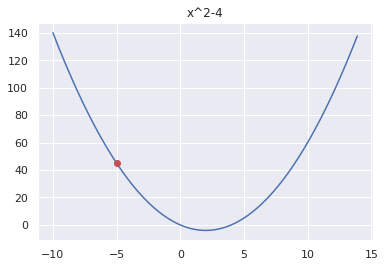

In [54]:
w = np.arange(-10,14,0.1)
loss = w**2-4*w
point = -5

plt.plot(w, loss)
plt.plot(-5, (-5)**2-4*(-5), 'ro')
plt.title('x^2-4')

In [65]:
def gradient_descent(df=lambda w: 2*w-4, learning_rate = 0.01, w_0 = -5, max_iters=10000, precision = 0.0000001):

    iters = 0
    previous_step_size = 1
    weights = []


    while (previous_step_size > precision and iters < max_iters):
        w_prev = w_0
        w_0 = w_0 - learning_rate*df(w_prev)
        previous_step_size = abs(w_prev - w_0)
        iters += 1
        weights.append(w_0)
        #rint('Iter #{}: obecny punkt: {}'.format(iters, w_0))
    print('Minimum globalne: {}'.format(w_0))
    return weights

In [68]:
weights = gradient_descent(learning_rate=0.1)

Minimum globalne: 1.9999996225607466


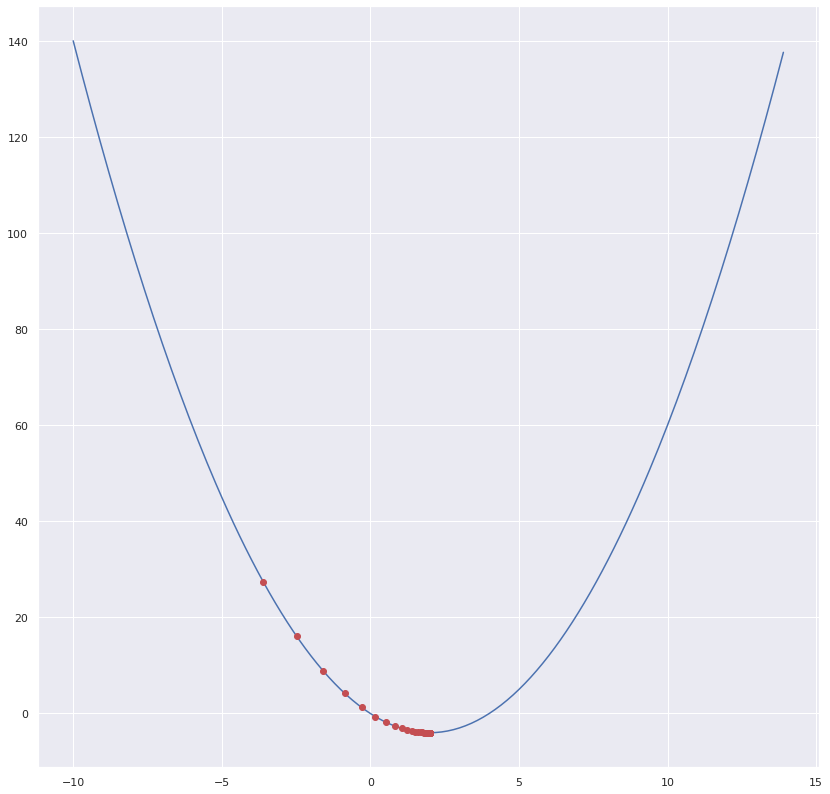

In [70]:
plt.figure(figsize=(14,14))
plt.plot(w, loss)
for weight in weights:
    plt.plot(weight, weight**2-4*weight, 'ro')

## Implementacja sieci neuronowej

### Zad 10

In [81]:
import numpy as np

np.random.seed(0)

X = np.array([[1.0, 0.7]])
y_true = np.array([1.80])

In [82]:
print(X)

[[1.  0.7]]


In [85]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x)
    W2 = np.random.randn(n_h,n_y)
    return W1, W2

In [86]:
W1, W2 = initialize_parameters(2,2,1)
W1

array([[0.14404357, 1.45427351],
       [0.76103773, 0.12167502]])

In [93]:
def forward_propagation(X, W1, W2):
    H = np.dot(X, W1)
    y_pred = np.dot(H, W2)
    return H, y_pred

In [94]:
def calculate_error(y_true, y_pred):
    return y_pred - y_true

### Zad 11

In [101]:
def backpropagation(X, W1, W2, learning_rate = 0.01, iters=1000, precision = 0.0000001):

    H, y_pred = forward_propagation(X, W1, W2)
    for i in range(iters):
        error = calculate_error(y_true, y_pred)
        W2 = W2 - learning_rate*error*H.T
        W1 = W1 - learning_rate*error*X.T*W2.T
        _, y_pred = forward_propagation(X, W1, W2)

        print(f'Iter {i}, y_pred: {y_pred[0][0]}, error: {calculate_error(y_true, y_pred)[0][0]}')
        if abs(error)<precision:
            break
    return W1, W2

def predict(X, W1, W2):
    _, y_pred = forward_propagation(X, W1, W2)
    return y_pred

def build_model():
    W1, W2 = initialize_parameters(2,2,1)
    W1, W2 = backpropagation(X, W1, W2)

    model = {'W1': W1, 'W2': W2}
    return model

In [103]:
np.set_printoptions(suppress=True)
build_model()

Iter 0, y_pred: 2.3337118587091954, error: 0.5337118587091954
Iter 1, y_pred: 2.294261526598468, error: 0.494261526598468
Iter 2, y_pred: 2.2579850271555997, error: 0.45798502715559963
Iter 3, y_pred: 2.2245895253260377, error: 0.42458952532603766
Iter 4, y_pred: 2.193814660216892, error: 0.39381466021689193
Iter 5, y_pred: 2.165428162614328, error: 0.3654281626143281
Iter 6, y_pred: 2.1392221747545856, error: 0.3392221747545856
Iter 7, y_pred: 2.1150101434241626, error: 0.31501014342416256
Iter 8, y_pred: 2.0926241838340855, error: 0.2926241838340855
Iter 9, y_pred: 2.0719128321814684, error: 0.27191283218146833
Iter 10, y_pred: 2.052739120806457, error: 0.2527391208064571
Iter 11, y_pred: 2.0349789224316344, error: 0.23497892243163432
Iter 12, y_pred: 2.0185195199236237, error: 0.21851951992362362
Iter 13, y_pred: 2.0032583659366794, error: 0.20325836593667934
Iter 14, y_pred: 1.9891020031352926, error: 0.18910200313529257
Iter 15, y_pred: 1.97596512079019, error: 0.17596512079019
It

{'W1': array([[-1.18806937,  0.7481478 ],
        [-1.56858965, -0.23328007]]), 'W2': array([[-0.70148433],
        [ 0.33572491]])}